Level-3 Task-3

Task : Price Range vs. Online Delivery and Table Booking.

1) Analyze if there is a relationship between the price range and the availability of online
delivery and table booking.

2) Determine if higher-priced restaurants are more likely to offer these services.



In [1]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the Dataset
df = pd.read_csv(r"C:\Users\asus\OneDrive\Desktop\data analytic\intern Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

1) Analyze if there is a relationship between the price range and the availability of online
delivery and table booking.


In [10]:
price_vs_online_delivery = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0)
price_vs_table_booking = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack().fillna(0)


print("Price Range VS Online delivery:")
print(price_vs_online_delivery)

print("\nprice Range VS Table booking:")
print(price_vs_table_booking)

Price Range VS Online delivery:
Has Online delivery        No       Yes
Price range                            
1                    0.842259  0.157741
2                    0.586894  0.413106
3                    0.708097  0.291903
4                    0.909556  0.090444

price Range VS Table booking:
Has Table booking        No       Yes
Price range                          
1                  0.999775  0.000225
2                  0.923225  0.076775
3                  0.542614  0.457386
4                  0.532423  0.467577


2) Determine if higher-priced restaurants are more likely to offer these services.

In [15]:
higher_price_restaurants = df.loc[df['Price range'] > df['Price range'].median()]
higher_price_vs_online_delivery = higher_price_restaurants['Has Online delivery'].value_counts(normalize=True)
higher_price_vs_table_booking = higher_price_restaurants['Has Table booking'].value_counts(normalize=True)

print("\nHigher-Priced Restaurants v/s Online delivery:")
print(higher_price_vs_online_delivery)

print("\nHigher-Priced Restaurants v/s Table booking:")
print(higher_price_vs_table_booking)


Higher-Priced Restaurants v/s Online delivery:
Has Online delivery
No     0.767302
Yes    0.232698
Name: proportion, dtype: float64

Higher-Priced Restaurants v/s Table booking:
Has Table booking
No     0.539619
Yes    0.460381
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Higher-Priced Restaurants v/s Online Delivery')

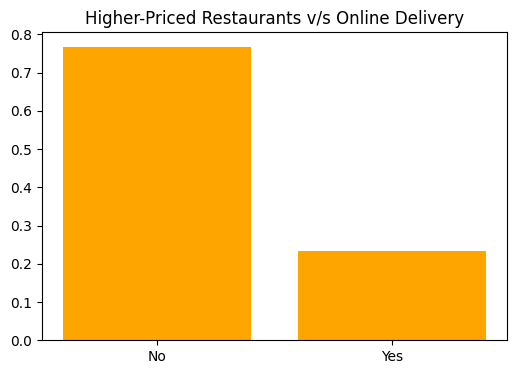

In [30]:
plt.figure(figsize=(6,4))
plt.bar(higher_price_vs_online_delivery.index, higher_price_vs_online_delivery.values, color='orange')
plt.title('Higher-Priced Restaurants v/s Online Delivery')



Text(0.5, 1.0, 'Higher-Priced Restaurants v/s Table Booking')

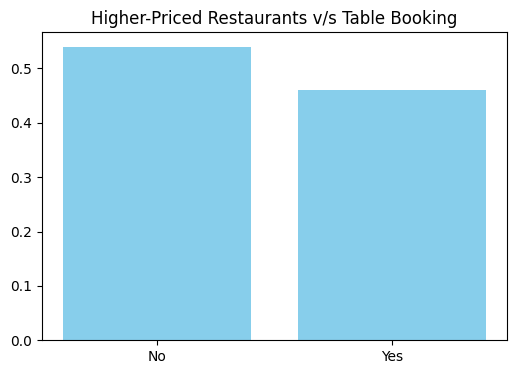

In [31]:
plt.figure(figsize=(6,4))
plt.bar(higher_price_vs_table_booking.index, higher_price_vs_table_booking.values, color='skyblue')
plt.title('Higher-Priced Restaurants v/s Table Booking')
